In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [108]:
df = pd.read_excel("C:/Users/durga prasad/Downloads/House_Rent_Train.xlsx")

In [86]:
df.head(2)

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20528 non-null  object 
 2   locality         20395 non-null  object 
 3   activation_date  20532 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20532 non-null  object 
 7   gym              20555 non-null  int64  
 8   lift             20555 non-null  int64  
 9   swimming_pool    20555 non-null  int64  
 10  negotiable       20555 non-null  int64  
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  int64  
 14  property_age     20532 non-null  float64
 15  bathroom         20532 non-null  float64
 16  facing           20532 non-null  object 
 17  cup_board   

In [110]:
df.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [111]:
df["locality"].fillna("unknown", inplace = True)

In [112]:
df["type"].fillna("unknown", inplace = True)

In [113]:
df.dropna(inplace=True)

In [92]:
df.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [114]:
df.duplicated().sum()

32

In [115]:
df=df.drop_duplicates()

In [95]:
df.duplicated().sum()

0

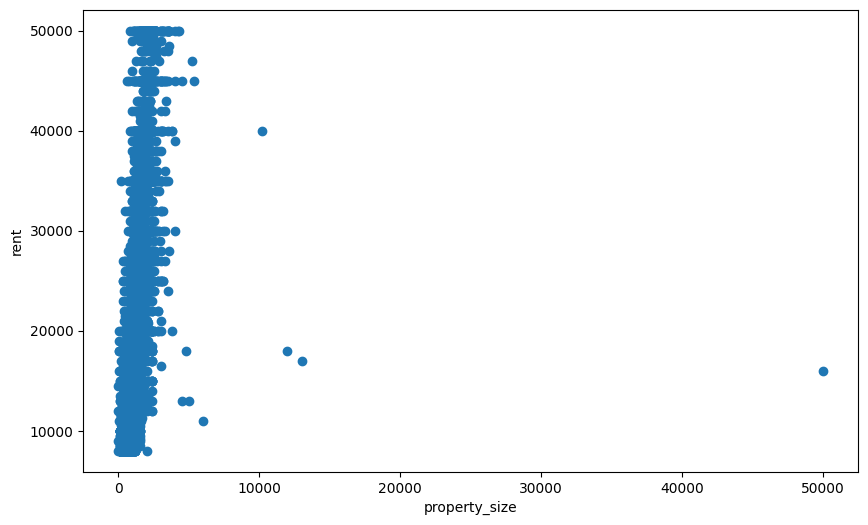

In [96]:
plt.figure(figsize=(10, 6))
plt.scatter(df['property_size'], df['rent'])
plt.xlabel('property_size')
plt.ylabel('rent')
plt.show()

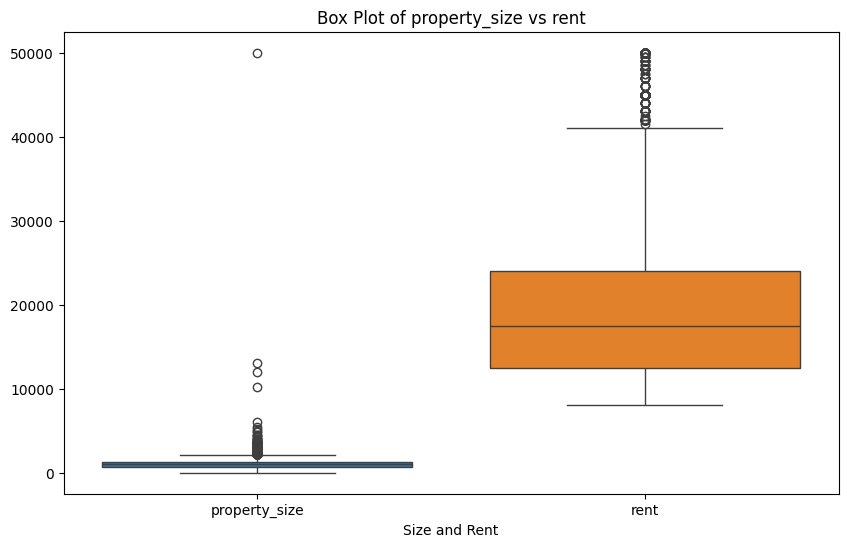

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['property_size', 'rent']])
plt.title('Box Plot of property_size vs rent')
plt.xlabel('Size and Rent')
plt.show()

In [116]:
df1 = df.copy()

In [117]:
df1.drop(df1[df1['property_size'] > 5000].index, inplace=True)
df1.drop(df1[df1['rent'] > 48000].index, inplace=True)

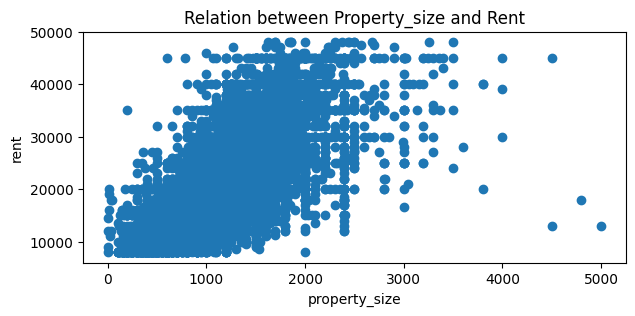

In [20]:
plt.figure(figsize=(7,3))
plt.scatter(df1['property_size'], df1['rent'])
plt.title("Relation between Property_size and Rent")
plt.xlabel('property_size')
plt.ylabel('rent')
plt.show()

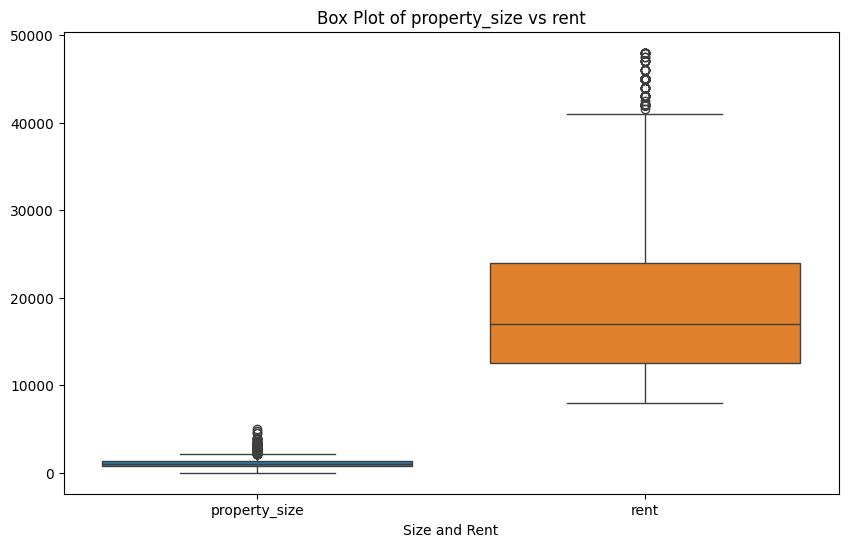

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1[['property_size', 'rent']])
plt.title('Box Plot of property_size vs rent')
plt.xlabel('Size and Rent')
plt.show()

VISUALIZATION

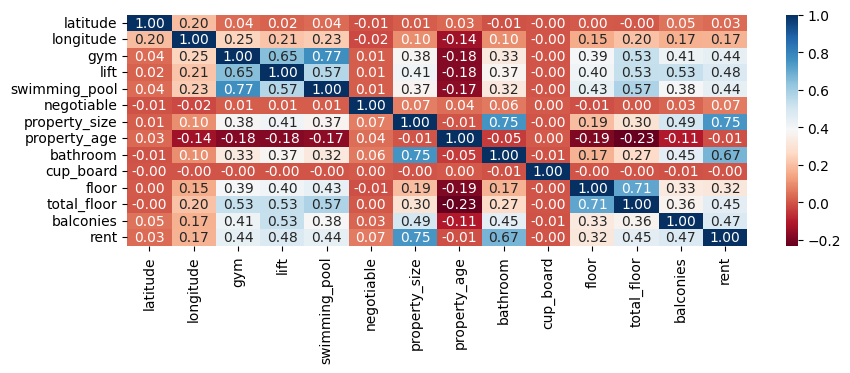

In [24]:
numeric_data = df1.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10,3))
sns.heatmap(numeric_data.corr(),annot=True,cmap='RdBu', fmt=".2f")
plt.show()

In [118]:
df1.loc[1, "amenities"]

'{"LIFT":true,"GYM":false,"INTERNET":false,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":true,"SC":true,"GP":false,"PARK":true,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}'

In [119]:
import json
# Convert the string representation of the dictionary to a dictionary
df1['amenities_dict'] = df1['amenities'].apply(lambda x: json.loads(x) if pd.notnull(x) else {})

# Count the number of True values in each row of the amenities dictionary
df1['true_count'] = df1['amenities_dict'].apply(lambda x: sum(value is True for value in x.values()))

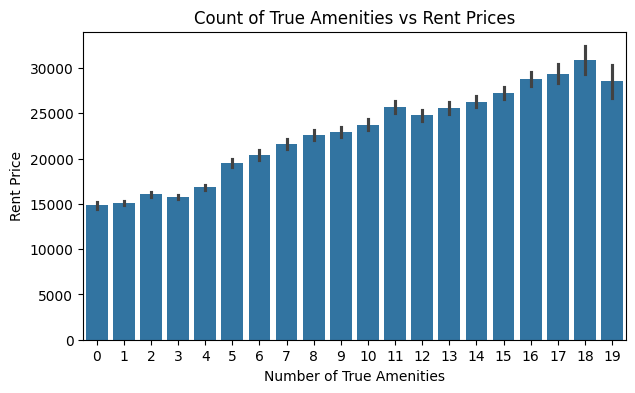

In [29]:
# Visualize the count of True amenities versus rent prices using a bar plot
plt.figure(figsize=(7, 4))
sns.barplot(x='true_count', y='rent', data=df1)
plt.title('Count of True Amenities vs Rent Prices')
plt.xlabel('Number of True Amenities')
plt.ylabel('Rent Price')
plt.show()

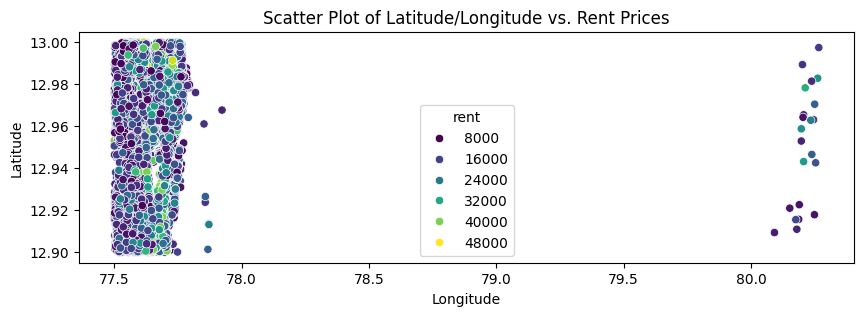

In [31]:
plt.figure(figsize=(10,3))
sns.scatterplot(x='longitude', y='latitude', hue='rent', data=df1, palette='viridis')
plt.title('Scatter Plot of Latitude/Longitude vs. Rent Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [32]:
print(df[['latitude', 'longitude']].describe())

           latitude     longitude
count  20500.000000  20500.000000
mean      12.945751     77.637280
std        0.029594      0.110586
min       12.900004     77.500072
25%       12.918188     77.571956
50%       12.943800     77.633491
75%       12.970952     77.695760
max       12.999999     80.266346


In [120]:
df_train = df1.copy()

In [121]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20364 entries, 0 to 20499
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20364 non-null  object 
 1   type             20364 non-null  object 
 2   locality         20364 non-null  object 
 3   activation_date  20364 non-null  object 
 4   latitude         20364 non-null  float64
 5   longitude        20364 non-null  float64
 6   lease_type       20364 non-null  object 
 7   gym              20364 non-null  int64  
 8   lift             20364 non-null  int64  
 9   swimming_pool    20364 non-null  int64  
 10  negotiable       20364 non-null  int64  
 11  furnishing       20364 non-null  object 
 12  parking          20364 non-null  object 
 13  property_size    20364 non-null  int64  
 14  property_age     20364 non-null  float64
 15  bathroom         20364 non-null  float64
 16  facing           20364 non-null  object 
 17  cup_board        

In [122]:
column_to_drop = [0,2,3,10,14,20,22,25]

# Drop the specified columns based on indices
df_train = df_train.drop(df_train.columns[column_to_drop], axis=1)

In [123]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20364 entries, 0 to 20499
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           20364 non-null  object 
 1   latitude       20364 non-null  float64
 2   longitude      20364 non-null  float64
 3   lease_type     20364 non-null  object 
 4   gym            20364 non-null  int64  
 5   lift           20364 non-null  int64  
 6   swimming_pool  20364 non-null  int64  
 7   furnishing     20364 non-null  object 
 8   parking        20364 non-null  object 
 9   property_size  20364 non-null  int64  
 10  bathroom       20364 non-null  float64
 11  facing         20364 non-null  object 
 12  cup_board      20364 non-null  float64
 13  floor          20364 non-null  float64
 14  total_floor    20364 non-null  float64
 15  water_supply   20364 non-null  object 
 16  balconies      20364 non-null  float64
 17  rent           20364 non-null  float64
 18  true_count 

In [124]:
df_train["type"].unique()

array(['BHK2', 'BHK3', 'BHK1', 'RK1', 'BHK4', 'BHK4PLUS', '1BHK1', 'bhk2',
       'bhk3', 'unknown'], dtype=object)

In [125]:
df_train["furnishing"].unique()

array(['SEMI_FURNISHED', 'FULLY_FURNISHED', 'NOT_FURNISHED'], dtype=object)

In [126]:
df_train['type'] = df_train['type'].replace('bhk2', 'BHK2')
df_train['type'] = df_train['type'].replace('bhk3', 'BHK3')
df_train['type'] = df_train['type'].replace('1BHK1', 'BHK1')

In [127]:
df_train['type'].value_counts().get('unknown', 0)

6

In [128]:
df_train.drop(df_train[df_train['type'] == 'unknown'].index, inplace=True)

In [129]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_columns = ['type', 'furnishing']
ordinal_encoder = OrdinalEncoder(categories=[
    ['RK1','BHK1', 'BHK2', 'BHK3', 'BHK4','BHK4PLUS'],  # type
    ['NOT_FURNISHED', 'SEMI_FURNISHED', 'FULLY_FURNISHED'],  # furnishing
])

# Apply ordinal encoding to multiple columns
df_train[ordinal_columns] = ordinal_encoder.fit_transform(df_train[ordinal_columns])

In [130]:
categorical_columns_train = df_train.select_dtypes(include=['object']).columns
df_train_encoded = pd.get_dummies(df_train, columns=categorical_columns_train, prefix=categorical_columns_train)

In [131]:
df_train_final = pd.concat([df_train, df_train_encoded], axis=1)
df_train_final = df_train_final.drop(categorical_columns_train, axis=1)

In [132]:
df_train_final.head(2)

,type,latitude,longitude,gym,lift,swimming_pool,furnishing,property_size,bathroom,cup_board,...,facing_N,facing_NE,facing_NW,facing_S,facing_SE,facing_SW,facing_W,water_supply_BOREWELL,water_supply_CORPORATION,water_supply_CORP_BORE
0,2.0,12.934471,77.634471,1,1,1,1.0,1250,2.0,2.0,...,False,False,False,False,False,False,False,False,False,True
1,2.0,12.929557,77.672280,0,1,0,1.0,1400,2.0,2.0,...,False,True,False,False,False,False,False,False,True,False


In [133]:
df_test=pd.read_excel("C:/Users/durga prasad/Downloads/House_Rent_Test.xlsx")

In [134]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20358 entries, 0 to 20499
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   type                      20358 non-null  float64
 1   latitude                  20358 non-null  float64
 2   longitude                 20358 non-null  float64
 3   gym                       20358 non-null  int64  
 4   lift                      20358 non-null  int64  
 5   swimming_pool             20358 non-null  int64  
 6   furnishing                20358 non-null  float64
 7   property_size             20358 non-null  int64  
 8   bathroom                  20358 non-null  float64
 9   cup_board                 20358 non-null  float64
 10  floor                     20358 non-null  float64
 11  total_floor               20358 non-null  float64
 12  balconies                 20358 non-null  float64
 13  rent                      20358 non-null  float64
 14  true_count 

In [135]:
import json
# Convert the string representation of the dictionary to a dictionary
df_test['amenities_dict'] = df_test['amenities'].apply(lambda x: json.loads(x) if pd.notnull(x) else {})

# Count the number of True values in each row of the amenities dictionary
df_test['true_count'] = df_test['amenities_dict'].apply(lambda x: sum(value is True for value in x.values()))

In [136]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4500 non-null   object 
 1   type             4500 non-null   object 
 2   locality         4500 non-null   object 
 3   activation_date  4500 non-null   object 
 4   latitude         4500 non-null   float64
 5   longitude        4500 non-null   float64
 6   lease_type       4500 non-null   object 
 7   gym              4500 non-null   int64  
 8   lift             4500 non-null   int64  
 9   swimming_pool    4500 non-null   int64  
 10  negotiable       4500 non-null   int64  
 11  furnishing       4500 non-null   object 
 12  parking          4500 non-null   object 
 13  property_size    4500 non-null   int64  
 14  property_age     4500 non-null   int64  
 15  bathroom         4500 non-null   int64  
 16  facing           4500 non-null   object 
 17  cup_board     

In [137]:
column_to_drop_test = [0,2,3,10,14,20,22,24]

# Drop the specified columns based on indices
df_test = df_test.drop(df_test.columns[column_to_drop_test], axis=1)

In [138]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_columns_test = ['type', 'furnishing']
ordinal_encoder_test = OrdinalEncoder(categories=[
    ['RK1','BHK1', 'BHK2', 'BHK3', 'BHK4','BHK4PLUS'],  # type
    ['NOT_FURNISHED', 'SEMI_FURNISHED', 'FULLY_FURNISHED'],  # furnishing
])

# Apply ordinal encoding to multiple columns
df_test[ordinal_columns] = ordinal_encoder.fit_transform(df_test[ordinal_columns])

In [139]:
categorical_columns_test = df_test.select_dtypes(include=['object']).columns
df_test_encoded = pd.get_dummies(df_test, columns=categorical_columns_test, prefix=categorical_columns_test)

In [140]:
df_test_final = pd.concat([df_test, df_test_encoded], axis=1)
df_test_final = df_test_final.drop(categorical_columns_train, axis=1)

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [142]:
y = df_train_final['rent']
X = df_train_final.drop('rent', axis=1) 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [144]:
y_pred = model.predict(X_test)

In [145]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 21526098.468389936


In [146]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3418.9013378802824


In [147]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.6719288565644181


In [148]:
# Hyperparamater Tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Defining a Base model
base_model = RandomForestRegressor(random_state = 42)

# Make a dictionary of hyperparameters values to search
search_space = {"n_estimators":[100,120], "bootstrap" : [True, False]}

# making an GridSearchCV Object
GS = GridSearchCV(estimator = base_model,
                  param_grid = search_space,
                  scoring = 'r2',
                  refit = 'r2', # this will return the model that is tested with the r2 metrices
                  cv = 3,
                  verbose = 4)

GS.fit(X,y)

best_params = GS.best_params_ # To get only the best hyperparameter values that we searched for
n_est = best_params.values()
print('n_estimator',n_est)

# Training data metrics

best_score = GS.best_score_ # score according to the metric we passes in refit
print('R2 Score :',best_score)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ..bootstrap=True, n_estimators=100;, score=0.805 total time= 1.0min
[CV 2/3] END ..bootstrap=True, n_estimators=100;, score=0.796 total time= 1.1min
[CV 3/3] END ..bootstrap=True, n_estimators=100;, score=0.803 total time=  56.5s
[CV 1/3] END ..bootstrap=True, n_estimators=120;, score=0.805 total time= 1.2min
[CV 2/3] END ..bootstrap=True, n_estimators=120;, score=0.797 total time= 1.4min
[CV 3/3] END ..bootstrap=True, n_estimators=120;, score=0.804 total time= 1.1min
[CV 1/3] END .bootstrap=False, n_estimators=100;, score=0.657 total time= 1.2min
[CV 2/3] END .bootstrap=False, n_estimators=100;, score=0.632 total time= 1.1min
[CV 3/3] END .bootstrap=False, n_estimators=100;, score=0.642 total time= 1.1min
[CV 1/3] END .bootstrap=False, n_estimators=120;, score=0.658 total time= 1.3min
[CV 2/3] END .bootstrap=False, n_estimators=120;, score=0.632 total time= 1.3min
[CV 3/3] END .bootstrap=False, n_estimators=120;,

In [149]:
final_model = RandomForestRegressor(n_estimators = 120, bootstrap = True, random_state = 42)
final_model.fit(X,y)

RandomForestRegressor(n_estimators=120, random_state=42)

In [69]:
y_pred = final_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.965196713530948


In [150]:
df_test_final.shape

(4500, 47)

In [151]:
df_train_final.shape

(20358, 49)

In [153]:
predicted_rent

array([[24741.66666667, 24741.66666667],
       [12314.16666667, 12314.16666667],
       [11678.75      , 11678.75      ],
       ...,
       [10972.5       , 10972.5       ],
       [23556.        , 23556.        ],
       [30695.83333333, 30695.83333333]])

In [155]:
predicted_rent = final_model.predict(df_test_final)

# Create a DataFrame with predictions
predicted_df = df_test.copy()
predicted_df['predicted_rent'] = predicted_rent[:,0]

# Save or use the predicted data
predicted_df.to_csv('predicted_rent.csv', index=False)

In [157]:
predi_df=pd.read_csv("C:/Users/durga prasad/Desktop/project/.venv/rent_estimator/predicted_rent.csv")

In [158]:
predi_df.head()

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,furnishing,parking,property_size,bathroom,facing,cup_board,floor,total_floor,water_supply,balconies,true_count,predicted_rent
0,2.0,12.941603,77.568156,FAMILY,0,1,0,1.0,BOTH,1300,2,N,2,3,3,CORP_BORE,1,4,24741.666667
1,2.0,12.998803,77.561887,ANYONE,0,0,0,1.0,TWO_WHEELER,600,1,S,2,0,3,CORPORATION,0,4,12314.166667
2,1.0,12.966467,77.661063,ANYONE,0,0,0,1.0,TWO_WHEELER,600,1,S,1,0,1,CORPORATION,0,5,11678.750000
3,1.0,12.941533,77.592606,ANYONE,0,0,0,0.0,TWO_WHEELER,500,1,E,0,2,2,CORP_BORE,0,2,10200.000000
4,3.0,12.971083,77.751625,ANYONE,1,1,1,1.0,BOTH,1400,3,E,3,3,4,BOREWELL,1,15,25133.333333


C:\Users\durga prasad\AppData\Local\Temp\ipykernel_17296\1776507616.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


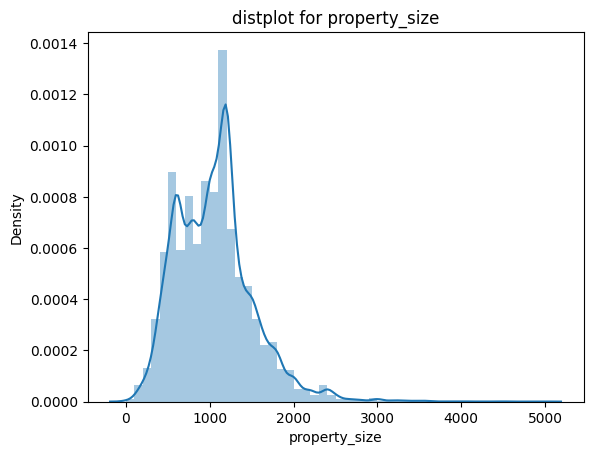

In [424]:
plot(df1,'property_size')


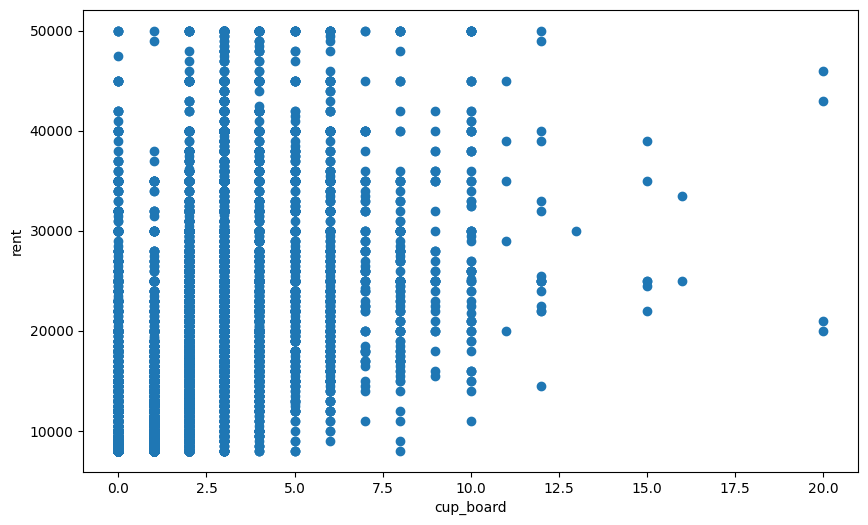

In [425]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['cup_board'], df1['rent'])
plt.xlabel('cup_board')
plt.ylabel('rent')
plt.show()

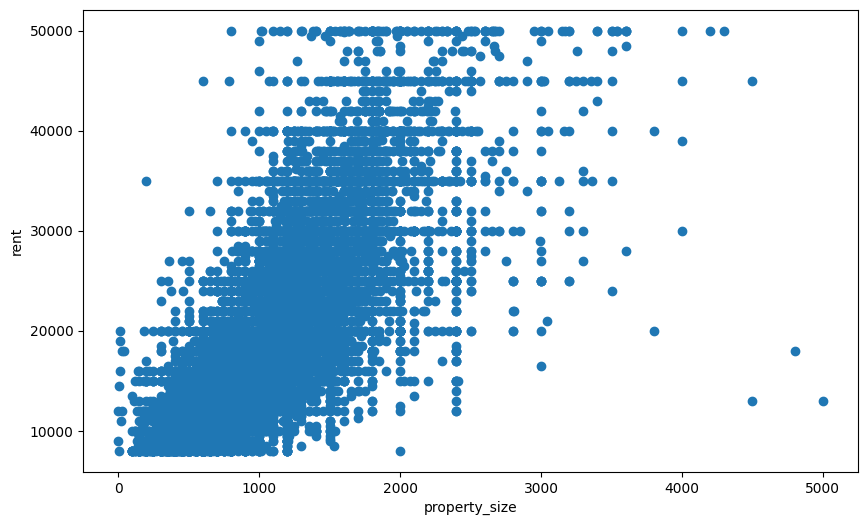

In [426]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['property_size'], df1['rent'])
plt.xlabel('property_size')
plt.ylabel('rent')
plt.show()

In [427]:
df2=df1.copy()

In [428]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
gym,20348.0,0.226410,0.418518,0.0,0.0,0.0,0.0,1.0
lift,20348.0,0.361117,0.480336,0.0,0.0,0.0,1.0,1.0
swimming_pool,20348.0,0.174661,0.379686,0.0,0.0,0.0,0.0,1.0
negotiable,20348.0,0.711323,0.453159,0.0,0.0,1.0,1.0,1.0
property_size,20348.0,1056.902447,461.206014,1.0,700.0,1045.0,1280.0,5000.0
property_age,20348.0,5.776342,6.361272,-1.0,1.0,5.0,10.0,400.0
bathroom,20348.0,1.857529,0.710452,1.0,1.0,2.0,2.0,21.0
cup_board,20348.0,2.208866,1.527557,0.0,1.0,2.0,3.0,20.0
floor,20348.0,1.869619,2.182411,0.0,1.0,1.0,2.0,25.0
total_floor,20348.0,3.799194,3.185517,0.0,2.0,3.0,4.0,26.0


In [429]:
def handle_outliers(column):
    # Check if the column is numeric
    if pd.to_numeric(column, errors='coerce').notna().all():
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return column[(column >= lower_bound) & (column <= upper_bound)]
    else:
        return column

# Identify and handle outliers for all columns
df_no_outliers = df2.apply(handle_outliers)

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(df_no_outliers)

DataFrame without outliers:
      No_Of_Rooms               locality lease_type  gym  lift  swimming_pool  \
1            BHK2              Bellandur     ANYONE  0.0     1            0.0   
2            BHK3          Thiruvanmiyur     FAMILY  0.0     1            0.0   
3            BHK1              Attiguppe     FAMILY  0.0     0            0.0   
4            BHK3              Kodihalli     FAMILY  0.0     0            0.0   
5            BHK1   Seetharampalya,Hoodi     FAMILY  NaN     1            NaN   
...           ...                    ...        ...  ...   ...            ...   
20492        BHK1                 Ulsoor     ANYONE  0.0     1            0.0   
20496        BHK2  Koramangala 4th Block     ANYONE  0.0     0            0.0   
20497        BHK2     Kumaraswamy Layout     FAMILY  NaN     1            0.0   
20498        BHK2            Indiranagar     FAMILY  0.0     1            0.0   
20499        BHK1      Malleshwaram West     ANYONE  0.0     0            0.0   


In [430]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
gym,20348.0,0.226410,0.418518,0.0,0.0,0.0,0.0,1.0
lift,20348.0,0.361117,0.480336,0.0,0.0,0.0,1.0,1.0
swimming_pool,20348.0,0.174661,0.379686,0.0,0.0,0.0,0.0,1.0
negotiable,20348.0,0.711323,0.453159,0.0,0.0,1.0,1.0,1.0
property_size,20348.0,1056.902447,461.206014,1.0,700.0,1045.0,1280.0,5000.0
property_age,20348.0,5.776342,6.361272,-1.0,1.0,5.0,10.0,400.0
bathroom,20348.0,1.857529,0.710452,1.0,1.0,2.0,2.0,21.0
cup_board,20348.0,2.208866,1.527557,0.0,1.0,2.0,3.0,20.0
floor,20348.0,1.869619,2.182411,0.0,1.0,1.0,2.0,25.0
total_floor,20348.0,3.799194,3.185517,0.0,2.0,3.0,4.0,26.0


C:\Users\durga prasad\AppData\Local\Temp\ipykernel_17296\2410216759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_col.dropna())


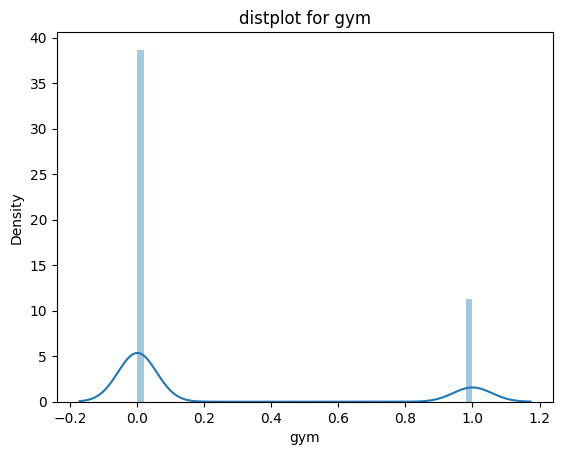

C:\Users\durga prasad\AppData\Local\Temp\ipykernel_17296\2410216759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_col.dropna())


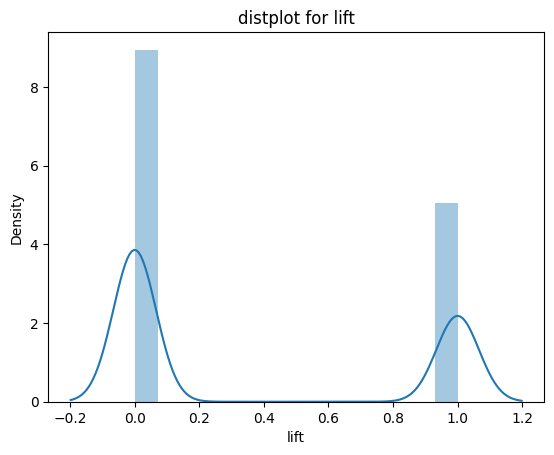

C:\Users\durga prasad\AppData\Local\Temp\ipykernel_17296\2410216759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_col.dropna())


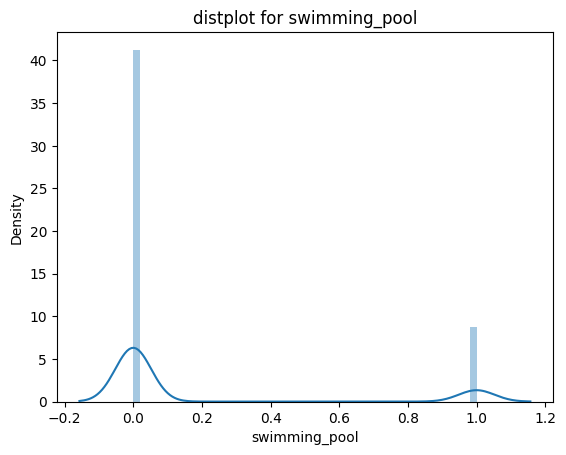

C:\Users\durga prasad\AppData\Local\Temp\ipykernel_17296\2410216759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_col.dropna())


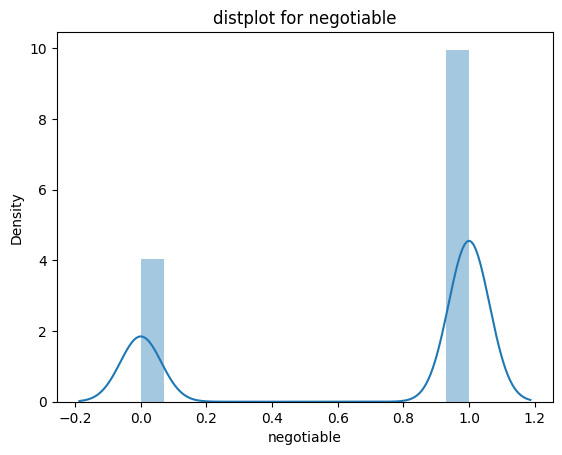

C:\Users\durga prasad\AppData\Local\Temp\ipykernel_17296\2410216759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_col.dropna())


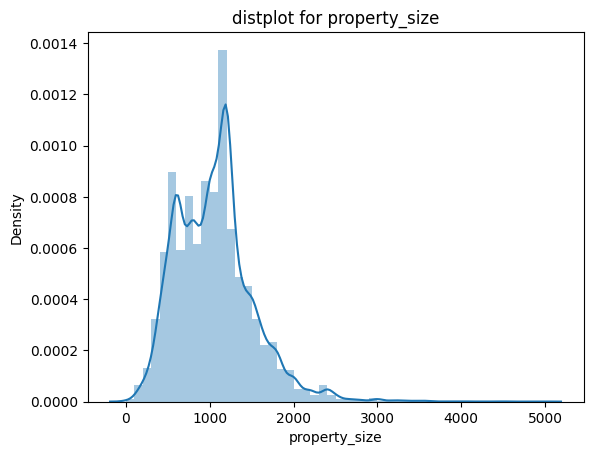

C:\Users\durga prasad\AppData\Local\Temp\ipykernel_17296\2410216759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_col.dropna())


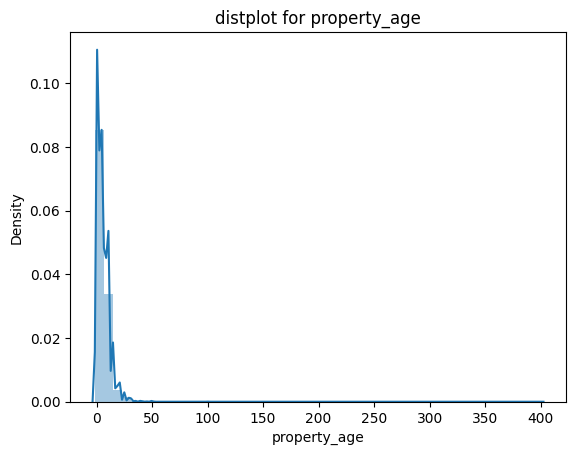

C:\Users\durga prasad\AppData\Local\Temp\ipykernel_17296\2410216759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_col.dropna())


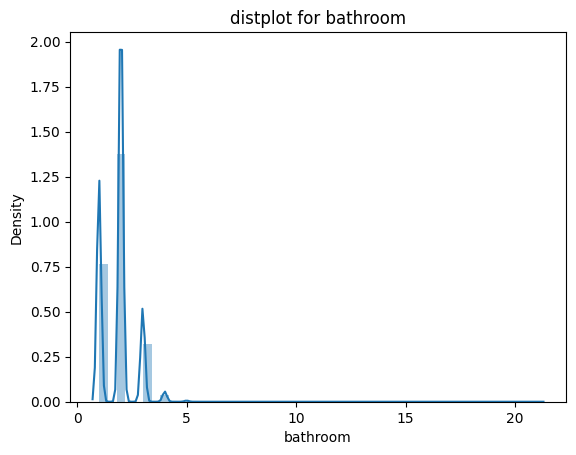

C:\Users\durga prasad\AppData\Local\Temp\ipykernel_17296\2410216759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_col.dropna())


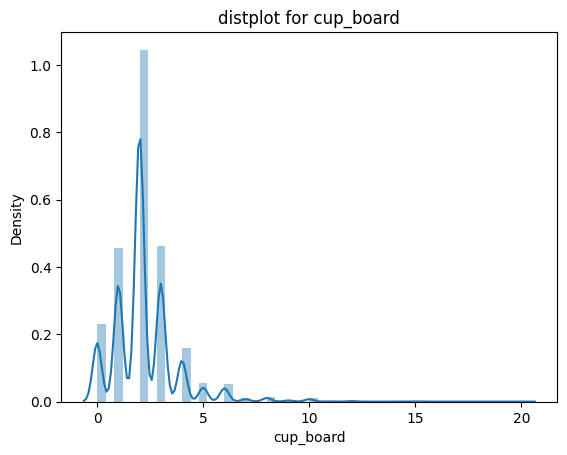

C:\Users\durga prasad\AppData\Local\Temp\ipykernel_17296\2410216759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_col.dropna())


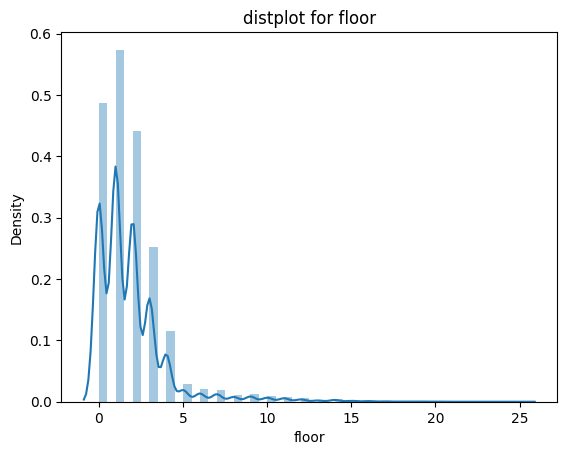

C:\Users\durga prasad\AppData\Local\Temp\ipykernel_17296\2410216759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_col.dropna())


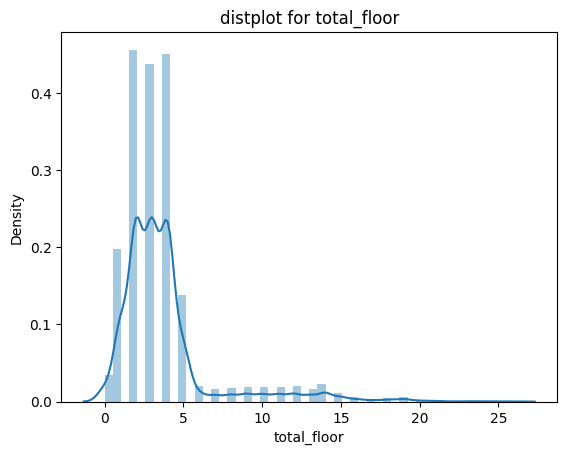

C:\Users\durga prasad\AppData\Local\Temp\ipykernel_17296\2410216759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_col.dropna())


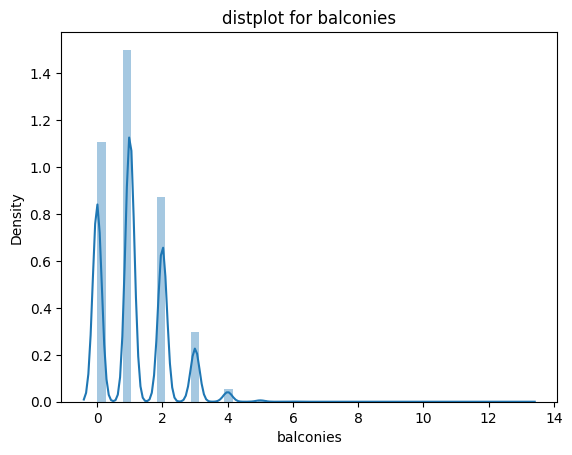

C:\Users\durga prasad\AppData\Local\Temp\ipykernel_17296\2410216759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_col.dropna())


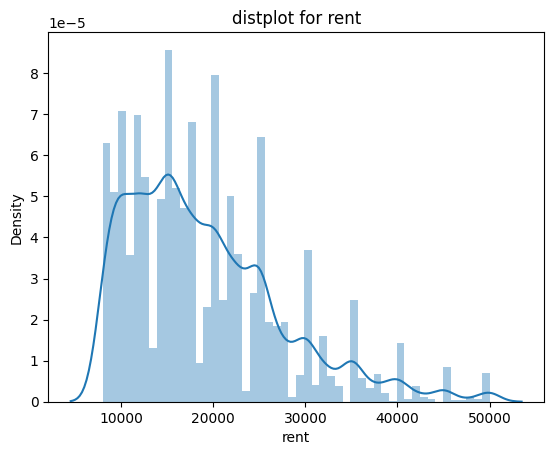

C:\Users\durga prasad\AppData\Local\Temp\ipykernel_17296\2410216759.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_col.dropna())


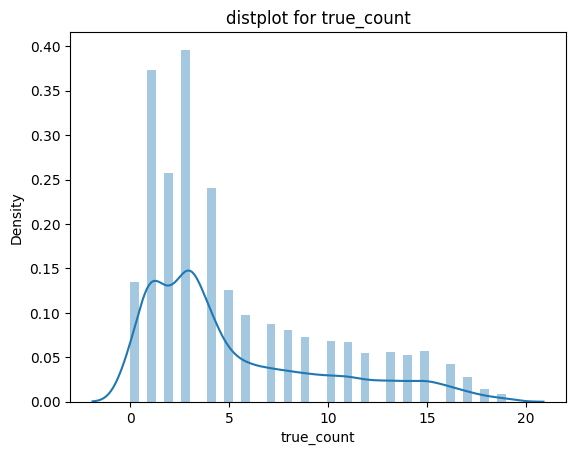

In [379]:
columns=[ 'gym', 'lift', 'swimming_pool',
       'negotiable', 'property_size', 'property_age', 'bathroom', 'cup_board','floor','total_floor','balconies','rent','true_count']
for i in columns:
  numeric_col = pd.to_numeric(df2[i], errors='coerce')
  sns.distplot(numeric_col.dropna())
  plt.title("distplot for" + " " + i)
  plt.show()

In [380]:
import math

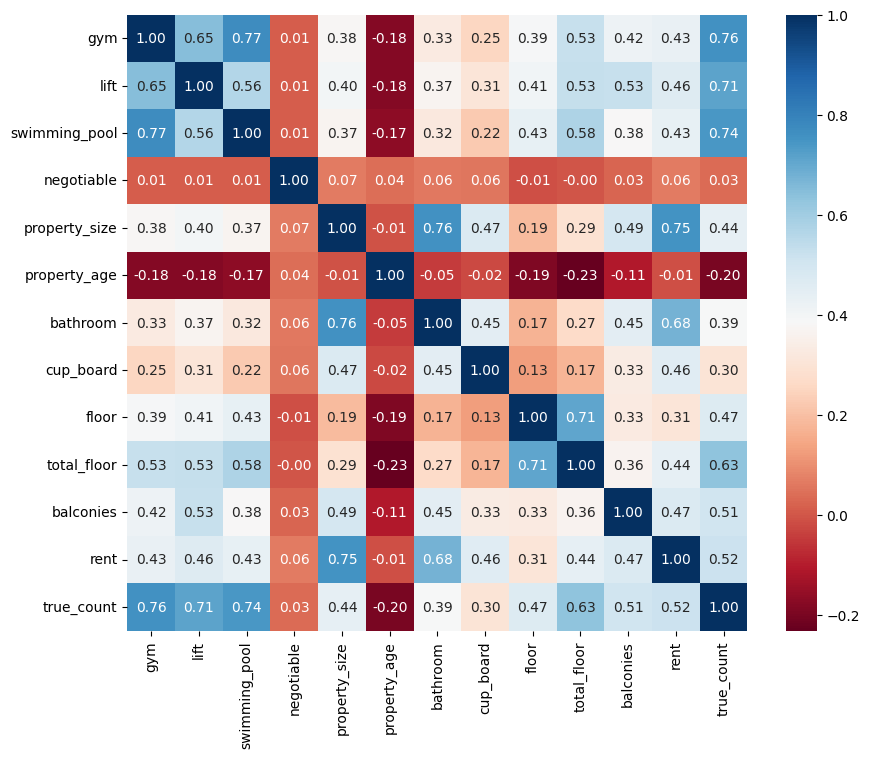

In [431]:
numeric_data = df2.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(),annot=True,cmap='RdBu', fmt=".2f")
plt.show()

In [432]:
df2.columns

Index(['No_Of_Rooms', 'locality', 'lease_type', 'gym', 'lift', 'swimming_pool',
       'negotiable', 'furnishing', 'parking', 'property_size', 'property_age',
       'bathroom', 'facing', 'cup_board', 'floor', 'total_floor',
       'water_supply', 'building_type', 'balconies', 'rent', 'true_count'],
      dtype='object')

In [433]:
df2.head()

,No_Of_Rooms,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,...,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,rent,true_count
1,BHK2,Bellandur,ANYONE,0,1,0,1,SEMI_FURNISHED,BOTH,1400,...,2.0,NE,2.0,3.0,4.0,CORPORATION,AP,2.0,22000.0,8
2,BHK3,Thiruvanmiyur,FAMILY,0,1,0,0,SEMI_FURNISHED,BOTH,1350,...,3.0,E,3.0,1.0,5.0,CORP_BORE,AP,3.0,28000.0,6
3,BHK1,Attiguppe,FAMILY,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,600,...,1.0,E,1.0,1.0,2.0,CORPORATION,IH,0.0,8000.0,0
4,BHK3,Kodihalli,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,...,3.0,E,4.0,0.0,0.0,CORPORATION,IH,1.0,45000.0,3
5,BHK1,"Seetharampalya,Hoodi",FAMILY,1,1,1,1,SEMI_FURNISHED,BOTH,1080,...,2.0,E,1.0,3.0,5.0,CORP_BORE,AP,2.0,18000.0,8


In [434]:
df_train=df2.copy()

In [435]:
import pandas as pd 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [436]:
x = df.drop(['rent'], axis = 1)
y = df['rent']

print(x.shape)
print(y.shape)

(20357, 20)
(20357,)


In [437]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16285, 20)
(4072, 20)
(16285,)
(4072,)


In [438]:
x_train.sample()

,No_Of_Rooms,locality,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,true_count
12780,BHK2,HSR Layout,FAMILY,0,0,0,0,SEMI_FURNISHED,BOTH,660,2.0,2.0,W,2.0,1.0,1.0,CORPORATION,IF,1.0,1


In [ ]:
transformer = ColumnTransformer([
    ('trans1', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'), 
     [0, 1, 2, 3, 4, 5, 6, 7, 8, 12, 16, 17])
], remainder='passthrough')
x_train_transformed = transformer.fit_transform(x_train)
x_test_transformed  = transformer.transform(x_test)

c:\Users\durga prasad\Desktop\project\.venv\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [443]:
# Hyperparamater Tuning

from sklearn.model_selection import GridSearchCV

# Defining a Base model
base_model = RandomForestRegressor(random_state = 42)

# Make a dictionary of hyperparameters values to search
search_space = {"n_estimators":[100,120], "bootstrap" : [True, False]}

# making an GridSearchCV Object
GS = GridSearchCV(estimator = base_model,
                  param_grid = search_space,
                  scoring = 'r2',
                  refit = 'r2', # this will return the model that is tested with the r2 metrices
                  cv = 3,
                  verbose = 4)

GS.fit(x_train_transformed,y_train)

best_params = GS.best_params_ # To get only the best hyperparameter values that we searched for
n_est = best_params.values()
print('n_estimator',n_est)

# Training data metrics

best_score = GS.best_score_ # score according to the metric we passes in refit
print('R2 Score :',best_score)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ..bootstrap=True, n_estimators=100;, score=0.740 total time= 4.3min
[CV 2/3] END ..bootstrap=True, n_estimators=100;, score=0.740 total time= 3.5min
[CV 3/3] END ..bootstrap=True, n_estimators=100;, score=0.716 total time= 3.1min
[CV 1/3] END ..bootstrap=True, n_estimators=120;, score=0.740 total time= 3.7min
[CV 2/3] END ..bootstrap=True, n_estimators=120;, score=0.741 total time= 3.6min
[CV 3/3] END ..bootstrap=True, n_estimators=120;, score=0.717 total time= 3.9min
[CV 1/3] END .bootstrap=False, n_estimators=100;, score=0.581 total time= 9.1min
[CV 2/3] END ...bootstrap=False, n_estimators=100;, score=nan total time= 6.9min
[CV 3/3] END .bootstrap=False, n_estimators=100;, score=0.560 total time= 6.7min
[CV 1/3] END .bootstrap=False, n_estimators=120;, score=0.581 total time= 7.4min
[CV 2/3] END .bootstrap=False, n_estimators=120;, score=0.584 total time= 6.7min
[CV 3/3] END .bootstrap=False, n_estimators=120;,

c:\Users\durga prasad\Desktop\project\.venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\durga prasad\Desktop\project\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\durga prasad\Desktop\project\.venv\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\durga prasad\Desktop\project\.venv\lib\site-packages\sklearn\ensemble\_forest.py", line 456, in f

KeyboardInterrupt: 

In [444]:
final_model = RandomForestRegressor(n_estimators = 100, bootstrap = True, random_state = 42)
final_model.fit(x_train_transformed, y_train)

In [392]:
def evaluation_metrics(y_test,y_pred):
    r2 = r2_score(y_test,y_pred)
    return r2

In [393]:
x_test

,No_Of_Rooms,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,true_count
7756,BHK2,ANYONE,1,1,1,1,SEMI_FURNISHED,BOTH,1100,2.0,2.0,W,2.0,2.0,13.0,BOREWELL,AP,2.0,15
3499,BHK2,FAMILY,0,1,0,1,FULLY_FURNISHED,FOUR_WHEELER,1150,3.0,2.0,E,4.0,2.0,3.0,BOREWELL,AP,3.0,8
15170,BHK2,FAMILY,1,1,1,0,SEMI_FURNISHED,BOTH,1320,0.0,2.0,W,2.0,6.0,17.0,CORP_BORE,AP,1.0,6
5525,BHK2,FAMILY,0,0,0,0,SEMI_FURNISHED,BOTH,900,0.0,2.0,N,2.0,2.0,3.0,CORP_BORE,IF,1.0,0
2490,BHK2,ANYONE,0,0,0,1,SEMI_FURNISHED,TWO_WHEELER,800,10.0,1.0,N,3.0,2.0,3.0,CORPORATION,IF,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,BHK2,FAMILY,0,0,0,1,SEMI_FURNISHED,BOTH,1500,5.0,2.0,NE,2.0,1.0,2.0,CORP_BORE,IF,0.0,3
18278,BHK2,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,1200,7.0,2.0,E,7.0,0.0,1.0,CORPORATION,IF,0.0,3
2979,BHK2,ANYONE,0,0,0,1,SEMI_FURNISHED,BOTH,900,4.0,1.0,N,0.0,1.0,3.0,CORPORATION,IF,0.0,1
2276,BHK2,FAMILY,1,0,0,0,SEMI_FURNISHED,TWO_WHEELER,1000,27.0,1.0,N,2.0,1.0,2.0,CORPORATION,IF,1.0,2


In [394]:
# Testing data metrics

y_pred = final_model.predict(x_test_transformed)

score = evaluation_metrics(y_test, y_pred)
print('The r2 score is',round(score, 1) * 100, '%')

The r2 score is 70.0 %


In [395]:
import pickle
with open("Classification_model.pkl","wb") as f:
    pickle.dump(final_model,f)

In [396]:
with open("Classification_model.pkl","rb") as f1:
  class_model= pickle.load(f1)

In [399]:
No_Of_Rooms = 'BHK2'
lease_type = 'FAMILY'
gym	= 1
lift = 1	
swimming_pool = 1
negotiable = 0
furnishing = 'SEMI_FURNISHED'
parking = 'BOTH'
property_size = 1250
property_age = 25
bathroom = 2
facing = 'E'
cup_board = 2
floor = 6
total_floor = 12
water_supply = 'CORP_BORE'
building_type = 'AP'
balconies = 2
true_count=15

user_df = pd.DataFrame([[No_Of_Rooms,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,property_size,property_age,bathroom,facing,cup_board,floor,total_floor,water_supply,building_type,balconies,true_count]], columns = ['No_Of_Rooms', 'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable', 'furnishing', 'parking', 'property_size', 'property_age', 'bathroom', 'facing', 'cup_board', 'floor', 'total_floor', 'water_supply', 'building_type', 'balconies','true_count'])
user_df

tranformed_df = transformer.transform(user_df)

y_pred = final_model.predict(tranformed_df)
print('The rental Price is', round(y_pred[0]))




The rental Price is 31500
